In [1]:
"""MgH+ Polaritonic Potential Energy Surfaces"""

__authors__ = ["Jonathan J. Foley"]
__email__   = ["foleyj10@wpunj.edu"]
__credits__ = ["Jonathan J. Foley"]
__copyright__ = "(c) 2008-2020, The Psi4Education Developers"
__license__   = "BSD-3-Clause"
__date__      = "2021-02-11"

## Polaritonic surfaces of MgH+

#### Background
When molecules *strongly* interact with light, new quantum states, called polariton states, emerge that have
properties of light and of matter.   Consider the image below where in Panel A a single molecule
is contained in a cavity that strongly confines a single photon.  In the figure below, the cavity is imagined to
be two nanoscale mirrors separated by a small gap such that a photon of a particular wavelength can be trapped in the cavity, where the *longest* apparent wavelength of a photon that could be trapped in such a cavity would be given by
$$ \lambda = \frac{2 L}{n_{eff}} $$
where $L$ is the size of the gap and $n_{eff}$ is the effective refractive index of the medium within the cavity.  

<img src="figure.jpg" width=500 height=500 />
 
The idea is to trap a photon with an energy that matches an electronic transition energy in a molecule.
The photon energy is given by $\hbar \omega$, where 

$$ \omega = \frac{2\pi c}{n_{eff} \lambda} $$

can be controlled by $L$.  Besides matching the photon energy to the energy of the molecular transition, the
interaction energy between the photon and the molecule must be relatively large.  How do we compute the interaction energy?  We call the interaction energy $\hbar g$ where

$$ g = \mu_{mol} \cdot {\bf E} $$,

where $\mu_{mol}$ is the transition dipole moment between the molecular electronic ground state and
the relevant molecular excited state, and ${\bf E}$ is the electric field associated with the photon in the cavity.
We demand that this energy must be large compared to the dissipation energy scale(s) of the system:

$$ g > \frac{\gamma_p + \gamma_m}{4} $$

where $\gamma_p$ is the inverse of the lifetime of the photon in the cavity and $\gamma_m$ is the inverse of the lifetime of the relevant electronic excited state.

As we will see, the excitation energy and transition dipole moment associated with the transition between 
two different molecular electronic states depends on energy.  This means that for a given cavity, certain regions
of the molecular potential energy surface will be polaritonic in character, and other regions will not.  

#### Model system
We will consider the diatomic cation MgH+ in a cavity chosen such that it can trap a photon with a 
frequency of $\hbar \omega = 4.3$ eV. 
We will compute the singlet ground state and first singlet excited state potential energy surfaces along the
Mg-H+ stretch coordinate using time-dependent density functional theory.  We denote the ground 
state ket as $|g\rangle$ with an associated energy eigenvalue $E_g(R)$, and the excited-state $|e\rangle$
with associated energy eigenvalue $E_e(R)$ where $R$ is the bondlength.  The transition dipole
moment between $|g\rangle$ and $|e\rangle$ will also be computed using TDDFT, yielding $\mu_{ge}(R)$.

We will consider two quantum states for the photon - no photon in the cavity, denoted by $|0\rangle$ with associated energy eigenvalue $\frac{ \hbar \omega}{2}$
and one photon in the cavity, denoted by $|1\rangle$ with associated energy eigenvalue $\frac{3 \hbar \omega}{2}$.  
We will model this system with a generalized Rabi Hamiltonian that can be written as:

$$ \hat{H} = E_g(R) \hat{a}_g^{\dagger} \hat{a}_g + E_e(R) \hat{a}_e^{\dagger} \hat{a}_e + 
\hbar \omega \left( \hat{b} \hat{b}^{\dagger} + \frac{1}{2} \right) + \hbar g(R) \left(\hat{b} + \hat{b}^{\dagger} \right) \left( \hat{a}_e^{\dagger} \hat{a}_g +  \hat{a}_g^{\dagger} \hat{a}_e\right). $$
The polaritonic potential energy surfaces may be obtained by building a Hamiltonian matrix in the following basis and diagonalizing as a function of the bond length $R$: $ |\phi\rangle \in \{|g,0\rangle , |g,1\rangle , |e,0\rangle, |e,1\rangle \}. $

#### Review of rules for the second quantized operators
The operators molecular electronic creation and annihilation operators $\hat{a}^{\dagger}_p$ and $\hat{a}_p$ act on the molecular electronic basis functions, and the the photonic raising and lowering operators $\hat{b}^{\dagger}$ and 
$\hat{b}$ act on the photonic basis functions.  The molecular electronic annihilation operators obey:
\begin{align}
\hat{a}_g|g\rangle = |\rangle \\
\hat{a}_e|e\rangle = |\rangle \\
\hat{a}_e|\rangle = 0 \\
\hat{a}_g|\rangle = 0 \\
\hat{a}_e|g\rangle = 0 \\
\hat{a}_g|e\rangle = 0
\end{align}
where $|\rangle$ denotes a fermionic Fock vacuum state.  

The molecular electronic creation operators obey:
\begin{align}
\hat{a}_g^{\dagger}|\rangle = |g\rangle \\
\hat{a}_e^{\dagger}|\rangle = |e\rangle \\
\hat{a}_g^{\dagger}|g\rangle = 0 \\
\hat{a}_e^{\dagger}|e\rangle = 0 
\end{align}

##### Question 1: Combine these rules to evaluate the following:
\begin{align}
\hat{a}_g^{\dagger}\hat{a}_e|e\rangle \\
\hat{a}_e^{\dagger}\hat{a}_g|g\rangle \\
\hat{a}_g^{\dagger}\hat{a}_e|g\rangle \\
\hat{a}_e^{\dagger}\hat{a}_g|e\rangle 
\end{align}

The photonic raising operators generally obey $\hat{b}^{\dagger}|n\rangle = \sqrt{n+1}|n+1\rangle$,
where $n$ denotes the number of photons that occupy the cavity.  
For the basis states in question, we have the following:
\begin{align}
\hat{b}^{\dagger}|0\rangle = |1\rangle \\
\hat{b}^{\dagger}|1\rangle = \sqrt{2}|2\rangle
\end{align}
where $|\rangle$ denotes a fermionic Fock vacuum state.

The photonic lowering operators generally obey $\hat{b}|n\rangle = \sqrt{n}|n-1\rangle$, so for the
basis states in question, we have:
\begin{align}
\hat{b}|1\rangle = |0\rangle \\
\hat{b}|0\rangle = 0.
\end{align}

##### Question 2: Combine the molecular and photonic creation and annihilation operator rules to derive elements of the Hamiltonian matrix

This matrix as a function of the bond-length $R$ is as follows:
\begin{equation}
{\bf H}(R)
  \mbox{=} 
  \begin{array}{c|cccc}
       & |g,0\rangle & |g,1\rangle & |e,0\rangle \\
    \hline
    \langle g,0| & E_g(R) + \frac{1}{2}\hbar \omega   &     0   & 0  \\
    \langle g,1| & 0        &   E_g(R) +  \frac{3}{2}\hbar \omega  & \hbar g(R) \\
    \langle e,0| & 0        &    \hbar g(R)  & E_e(R) + \frac{1}{2}\hbar \omega\\
  \end{array}
\end{equation}

##### Procedure
We will build and diagonalize this matrix across a range of bondlength values ($R$), and the 
resulting eigenvalues will comprise the polaritonic potential energy surfaces.  The resulting 
eigenvectors will comprise the polaritonic energy eigenstates.  We will utilize the `psi4` package to compute
$E_g(R)$, $E_e(R)$, and $\mu_{qe}(R)$ to be used in the model Hamiltonian above.

In [1]:
### Import libraries to be used throughout
# basic psi4 library
import psi4
# numpy
import numpy as np
# scipy
from scipy.interpolate import InterpolatedUnivariateSpline
# linear algebra package from numpy
from numpy import linalg as LA
# time-dependent scf library from psi4 for computing excited states and transition dipole moments
from psi4.driver.procrouting.response.scf_response import tdscf_excitations

In [3]:
# run across MgH+ stretch across 25 geometries from 1.1 to 3.5 Angstroms

# set basis
psi4.set_options({
    'basis':'cc-pVDZ'
})

# set the number of electronic states... this is the ground state + n_states more
# we will get 2 excited-states, though we are only interested in the lowest excited state
n_states = 2

# set the number of bond lengths to compute the stretch along
n_geoms = 25

# initialize geometry list
geoms = []

# initialize energy list... note
# there will be the ground state energy + n_states excited state energies
Es = np.zeros((n_states+1, n_geoms))

# initialize z-component of transition dipole list
mu_z = np.zeros((n_states, n_geoms))
# generate bond lengths
rs = []
for i in range(0,n_geoms):
    rs.append(1.1 + i*0.1)

# loop over bond lengths
ctr = 0
for i in rs:
    # generate the MgH+ molecule using a z-matrix and set the Mg-H+ bond length
    mol = psi4.geometry("""
    Mg
    H 1 """ + str(i) + """
    symmetry c1
    1 1
    """)
    # save the geometry
    geoms.append(mol.geometry().to_array())
    psi4.set_options({
    'save_jk': True,
    })  
   
    # calculate and save the ground-state energy and wavefunction
    e, wfn = psi4.energy("b3lyp/cc-pVDZ", return_wfn=True, molecule=mol)
    
    # calculate the excited-state energies
    res = tdscf_excitations(wfn, states=n_states, triplets = "NONE")
    
    # get excitation energies
    delta_e = [r["EXCITATION ENERGY"] for r in res]
    # get transition dipole moments
    mu = [r["ELECTRIC DIPOLE TRANSITION MOMENT (LEN)"] for r in res]
    Es[0,ctr] = e
    
    for j in range(0, n_states):
        Es[j+1,ctr] = e + delta_e[j]
        mu_z[j,ctr] = mu[j][2]
    print(i, Es[:,ctr])
    ctr += 1

right vecs
[[-6.25081403e-05 -7.30804655e-19  8.01368949e-19  2.95804895e-06
  -3.21125923e-05 -1.61926085e-18  1.48282251e-18  3.68727200e-05
   6.39674448e-20 -2.10871149e-19 -5.08397448e-19  8.76836595e-19
   3.09561668e-05  8.24192673e-06 -3.44866451e-18 -2.96721683e-19
  -5.86962663e-05]
 [-2.21680522e-03 -2.09820163e-17  3.17156858e-17 -6.76095323e-04
  -1.41627596e-03 -2.18042253e-17  5.46495136e-17  2.65705982e-04
   2.23957300e-18 -1.63548612e-17 -9.82762912e-18  5.90821937e-18
   2.25163929e-03  2.12623834e-04 -1.52640795e-16 -2.31954914e-17
  -2.47098997e-03]
 [-4.22483848e-03  3.67578139e-16 -1.35588579e-16 -8.94353047e-03
  -9.89048100e-04  5.39794088e-16 -1.70955872e-16 -4.93900089e-03
   1.97165772e-15  1.54990530e-15  1.48229911e-18 -1.19655507e-16
   9.38116857e-03 -2.30780332e-03 -1.39490192e-15  4.42314500e-16
  -9.88005310e-03]
 [-1.25773217e-15 -6.80904712e-05  6.77311745e-04 -2.49219639e-15
  -2.23939746e-16 -5.51153647e-05  8.86659771e-04 -1.19897396e-15
  -8.180

In [4]:
print(mu_z)

[[-1.35621316e+00 -1.37653509e+00  1.41026992e+00  1.45492827e+00
   1.50865751e+00  1.56955826e+00  1.63569277e+00  1.70523097e+00
   1.77658259e+00  1.84846041e+00  1.91980343e+00  1.98973277e+00
   2.05747803e+00  2.12237561e+00  2.18375603e+00  2.24092525e+00
   2.29313067e+00  2.33957428e+00  2.37942665e+00  2.41195083e+00
   2.43656128e+00  2.45296765e+00  2.46122797e+00  2.46172598e+00
   2.45518021e+00]
 [ 1.50427646e-14 -7.00830517e-15  8.48282441e-15 -3.97985650e-15
   9.68824284e-15 -1.05168791e-14  1.63049746e-14 -1.67108380e-14
   3.98617058e-15  1.40746718e-14 -2.60005066e-14 -9.20102837e-14
   1.01618849e-14 -5.81084506e-15  4.08064176e-14 -8.94622385e-16
  -7.33819480e-15 -5.26819783e-14  8.51508692e-15 -2.05319952e-14
  -1.15644312e-14  1.17783261e-14  3.77390201e-14 -4.94445197e-14
  -1.33532499e-13]]


Now that we have the energies and transition dipole moments, we will plot $E_g(R)+\frac{\hbar \omega}{2}$, 
$E_e(R)+\frac{\hbar \omega}{2}$, and 
$E_g(R) +\frac{3 \hbar \omega}{2}$.

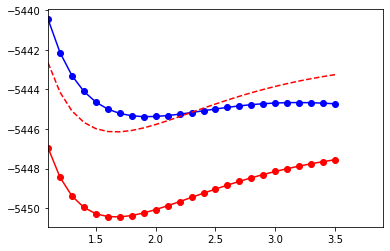

In [10]:
from matplotlib import pyplot as plt
plt.plot(rs[:], Es[0,:]*27.211+4.3/2, 'ro-')
plt.plot(rs[:], Es[1,:]*27.211+4.3/2, 'bo-')
plt.plot(rs[:], Es[0,:]*27.211+3*4.3/2, 'r--')
#plt.ylim(7,11)
plt.xlim(1.1,3.9)
plt.show()

We will also plot $\mu_{ge}(R)$.

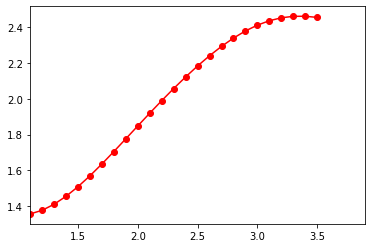

In [11]:
plt.plot(rs[:], np.abs(mu_z[0,:]), 'ro-')
plt.xlim(1.1,3.9)
plt.show()

#### Next steps

1. Fit each surface to a spline

2. Define a photonic Hamiltonian 

3. Define an interaction Hamiltonian

4. Build H_tot and diagonalize at each geometry

In [76]:
from numpy import linalg as LA
Eg_spline = InterpolatedUnivariateSpline(rs, Es[0,:], k=3)
Ee_spline = InterpolatedUnivariateSpline(rs, Es[1,:], k=3)

mu_spline = InterpolatedUnivariateSpline(rs, np.abs(mu_z[0,:]), k=3 )

# photon frequency in atomic units
om = 4.3 / 27.211


# conversion from atomic units of field strength 
# to GV / m as is used in the Figure 3 of 
# J. Chem. Phys. 153 234304 (2020)
Efield_SI_to_au = 5.14220674763e-11

# Medium electric field strength from paper JCP paper in SI units
E_field_medium = 3e12

# electric field in atomic units
#E_au = E_field_medium * Efield_SI_to_au
E_au = 0.003

Htot = np.zeros((3,3))

''' Polaritonic Hamiltonian will have the following structure

    | E_g(r)               0                        0            |
    |            E_g(r) + hbar * omega              E_au*mu(r)   |
    | 0                  E_au*mu(r)                   E_e(r)     |
    
'''

pl_1 = np.zeros_like(rs)
pl_2 = np.zeros_like(rs)
pl_3 = np.zeros_like(rs)
for i in range(0,len(rs)):
    # H_00 is just E_g
    Htot[0,0] = Eg_spline(rs[i])
    Htot[1,1] = Eg_spline(rs[i]) + om
    Htot[1,2] = E_au * mu_spline(rs[i])
    Htot[2,1] = E_au * mu_spline(rs[i])
    Htot[2,2] = Ee_spline(rs[i])


    vals, vecs = LA.eig(Htot)
    idx = vals.argsort()[::1]
    vals = vals[idx]
    pl_1[i] = np.real(vals[0])
    pl_2[i] = np.real(vals[1])
    pl_3[i] = np.real(vals[2])





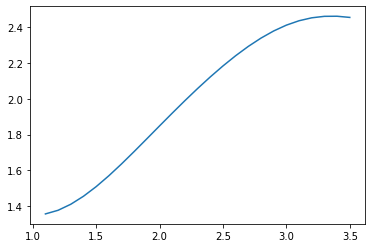

0.0025


In [70]:
plt.plot(rs, mu_spline(rs))
plt.show()
print(0.005 / 2.0)

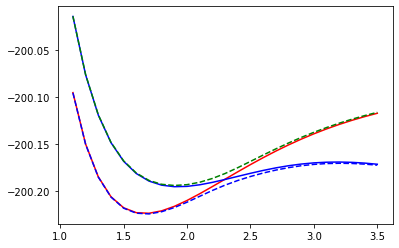

In [77]:
plt.plot(rs, Eg_spline(rs)+om, 'red')
#plt.plot(rs, pl_1, 'ro-')
plt.plot(rs, Ee_spline(rs), 'blue')
plt.plot(rs, pl_2, 'b--')
plt.plot(rs, pl_3, 'g--')